In [109]:
import os
import pandas as pd
import numpy as np

In [110]:
path = '../../Data_list/V1.0/시간대별 승하차 인원/'

In [111]:
file_list = os.listdir(path)
file_list

['일별 역별 시간대별 승하차인원(2020년).csv',
 '일별 역별 시간대별 승하차인원(2021년).csv',
 '일별 역별 시간대별 승하차인원(2022년 12월).csv',
 '일별 역별 시간대별 승하차인원(2023년 12월).csv',
 '일별 역별 시간대별 승하차인원(2024년 12월).csv',
 '일별 역별 시간대별 승하차인원(2024년 4월).csv',
 '일별 역별 시간대별 승하차인원(2024년 9월).csv',
 '일별 역별 시간대별 승하차인원(2025년 3월).csv']

In [112]:
# 1번부터 8번까지 데이터프레임 생성 - df1, df2, ...
for i, file in enumerate(file_list, start=1):
    globals()[f"df{i}"] = pd.read_csv(os.path.join(path, file), encoding='cp949')

C:\Users\orix4\AppData\Local\Temp\ipykernel_9464\1997025783.py:3: DtypeWarning: Columns (5,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[f"df{i}"] = pd.read_csv(os.path.join(path, file), encoding='cp949')


In [113]:
# 시간이 df1과 df2가 다름 = 합칠 때 오류 발생
df1.head(2)

,역번호,역명,년월일,구분,합계,01시~02시,02시~03시,03시~04시,04시~05시,05시~06시,...,15시~16시,16시~17시,17시~18시,18시~19시,19시~20시,20시~21시,21시~22시,22시~23시,23시~24시,24시~01시
0,95,다대포해수욕장,20200101,승차,7273,0,0,0,20,23,...,424,376,374,277,158,102,84,75,17,0
1,95,다대포해수욕장,20200101,하차,6681,6,4,0,1,64,...,321,347,280,186,153,121,108,96,81,63


In [114]:
df2.head(2)

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2021-01-01,승차,2323,0,0,1,4,24,...,308,272,237,132,59,53,55,20,7,0
1,95,다대포해수욕장,2021-01-01,하차,2010,0,0,1,1,26,...,199,160,158,76,71,41,57,34,21,13


In [115]:
# 시간 형식 통일 (~를 - 로 변경)
df1.columns = df1.columns.str.replace('~', '-', regex=True)
df1.head(2)

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,20200101,승차,7273,0,0,0,20,23,...,424,376,374,277,158,102,84,75,17,0
1,95,다대포해수욕장,20200101,하차,6681,6,4,0,1,64,...,321,347,280,186,153,121,108,96,81,63


- 결합 시 열 위치로 단순 결합하여 null값 발생함
- 열 위치가 아닌 "이름"으로 결합하여 문제 해결
- join='inner' 옵션 추가

In [116]:
# 모든 데이터프레임을 하나로 결합
combined_df = pd.concat([globals()[f"df{i}"] for i in range(1, 9)], axis=0, join='inner')
combined_df.tail(3)

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
20157,414,안평,2025-03-30,하차,1508,0,0,0,2,2,...,121,107,127,114,77,60,40,35,21,10
20158,414,안평,2025-03-31,승차,2173,0,0,0,7,36,...,137,188,177,179,44,35,20,10,3,0
20159,414,안평,2025-03-31,하차,2037,0,0,0,0,0,...,144,151,168,193,117,75,63,73,24,17


In [117]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517892 entries, 0 to 20159
Data columns (total 29 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   역번호      517892 non-null  int64 
 1   역명       517892 non-null  object
 2   년월일      517892 non-null  object
 3   구분       517892 non-null  object
 4   합계       517892 non-null  object
 5   01시-02시  517892 non-null  int64 
 6   02시-03시  517892 non-null  int64 
 7   03시-04시  517892 non-null  int64 
 8   04시-05시  517892 non-null  int64 
 9   05시-06시  517892 non-null  int64 
 10  06시-07시  517892 non-null  object
 11  07시-08시  517892 non-null  object
 12  08시-09시  517892 non-null  object
 13  09시-10시  517892 non-null  object
 14  10시-11시  517892 non-null  object
 15  11시-12시  517892 non-null  object
 16  12시-13시  517892 non-null  object
 17  13시-14시  517892 non-null  object
 18  14시-15시  517892 non-null  object
 19  15시-16시  517892 non-null  object
 20  16시-17시  517892 non-null  object
 21  17시-18시  517892 

# 시간 흐름에 따른 역 이용자 추세 파악

In [118]:
# 역 현황 파악
combined_df['역명'].unique()

array(['다대포해수욕장', '다대포항', '낫  개', '신장림', '장  림', '동  매', '신  평', '하  단',
       '당  리', '사  하', '괴  정', '대  티', '서대신', '동대신', '토  성', '자갈치',
       '남  포', '중  앙', '부산역', '초  량', '부산진', '좌  천', '범  일', '범내골', '1서면',
       '부  전', '양  정', '시  청', '1연산', '교  대', '1동래', '명  륜', '온천장', '부산대',
       '장  전', '구  서', '두  실', '남  산', '범어사', '노  포', '장  산', '중  동',
       '해운대', '동  백', '벡스코', '센텀시티', '민  락', '수  영', '광  안', '금련산',
       '남  천', '경성대부경대', '대  연', '못  골', '지게골', '문  현', '국제금융센터', '전  포',
       '2서면', '부  암', '가  야', '동의대', '개  금', '냉  정', '주  례', '감  전',
       '사  상', '덕  포', '모  덕', '모  라', '구  남', '구  명', '2덕천', '수  정',
       '화  명', '율  리', '동  원', '금  곡', '호  포', '증  산', '부산대양산', '남양산',
       '양  산', '망  미', '배  산', '물만골', '3연산', '거  제', '종합운동장', '사  직',
       '미  남', '만  덕', '남산정', '숙  등', '3덕천', '구  포', '강서구청', '체육공원',
       '대  저', '4동래', '수  안', '낙  민', '충렬사', '명  장', '서  동', '금  사',
       '반여농산물', '석  대', '영산대', '동부산대', '윗반송', '고  촌', '안  평', '낫개', '장림',
     

In [119]:
# 공백 제거
combined_df['역명'] = combined_df['역명'].str.replace(' ', '')
역_list = combined_df['역명'].unique().tolist()
combined_df['역명'].unique()

array(['다대포해수욕장', '다대포항', '낫개', '신장림', '장림', '동매', '신평', '하단', '당리', '사하',
       '괴정', '대티', '서대신', '동대신', '토성', '자갈치', '남포', '중앙', '부산역', '초량',
       '부산진', '좌천', '범일', '범내골', '1서면', '부전', '양정', '시청', '1연산', '교대',
       '1동래', '명륜', '온천장', '부산대', '장전', '구서', '두실', '남산', '범어사', '노포',
       '장산', '중동', '해운대', '동백', '벡스코', '센텀시티', '민락', '수영', '광안', '금련산',
       '남천', '경성대부경대', '대연', '못골', '지게골', '문현', '국제금융센터', '전포', '2서면',
       '부암', '가야', '동의대', '개금', '냉정', '주례', '감전', '사상', '덕포', '모덕', '모라',
       '구남', '구명', '2덕천', '수정', '화명', '율리', '동원', '금곡', '호포', '증산',
       '부산대양산', '남양산', '양산', '망미', '배산', '물만골', '3연산', '거제', '종합운동장',
       '사직', '미남', '만덕', '남산정', '숙등', '3덕천', '구포', '강서구청', '체육공원', '대저',
       '4동래', '수안', '낙민', '충렬사', '명장', '서동', '금사', '반여농산물', '석대', '영산대',
       '동부산대', '윗반송', '고촌', '안평', '서면', '연산', '동래', '국제금융센터부산은행', '덕천',
       '부산대양산캠퍼스', '반여농산물시장'], dtype=object)

In [120]:
# 년월일 파악
display(combined_df['년월일'].unique())
len(combined_df['년월일'].unique())

array([20200101, 20200102, 20200103, ..., '2025-03-29', '2025-03-30',
       '2025-03-31'], dtype=object)

1917

- 년월일에 datetime 형식인 경우도 있음
- '-'을 ''로 그냥 변환하면 NaN 발생
- 모든 데이터를 문자열로 변환 후 하이픈 제거

In [121]:
# 년월일을 문자열로 변환하고 하이픈 제거
combined_df['년월일'] = combined_df['년월일'].astype(str).str.replace('-', '')

display(combined_df['년월일'].unique())
len(combined_df['년월일'].unique())


array(['20200101', '20200102', '20200103', ..., '20250329', '20250330',
       '20250331'], dtype=object)

1917

In [122]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517892 entries, 0 to 20159
Data columns (total 29 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   역번호      517892 non-null  int64 
 1   역명       517892 non-null  object
 2   년월일      517892 non-null  object
 3   구분       517892 non-null  object
 4   합계       517892 non-null  object
 5   01시-02시  517892 non-null  int64 
 6   02시-03시  517892 non-null  int64 
 7   03시-04시  517892 non-null  int64 
 8   04시-05시  517892 non-null  int64 
 9   05시-06시  517892 non-null  int64 
 10  06시-07시  517892 non-null  object
 11  07시-08시  517892 non-null  object
 12  08시-09시  517892 non-null  object
 13  09시-10시  517892 non-null  object
 14  10시-11시  517892 non-null  object
 15  11시-12시  517892 non-null  object
 16  12시-13시  517892 non-null  object
 17  13시-14시  517892 non-null  object
 18  14시-15시  517892 non-null  object
 19  15시-16시  517892 non-null  object
 20  16시-17시  517892 non-null  object
 21  17시-18시  517892 

# 중복되는 역 파악
- 서면 1, 2
- 연산 1, 3
- 덕천 2, 3
- 동래 1, 4

In [123]:
combined_df['역명'] = combined_df['역명'].replace({'1서면': '서면', '2서면': '서면'})
combined_df['역명'] = combined_df['역명'].replace({'1연산': '연산', '3연산': '연산'})
combined_df['역명'] = combined_df['역명'].replace({'2덕천': '덕천', '3덕천': '덕천'})
combined_df['역명'] = combined_df['역명'].replace({'1동래': '동래', '4동래': '동래'})
combined_df['역명'].unique()

array(['다대포해수욕장', '다대포항', '낫개', '신장림', '장림', '동매', '신평', '하단', '당리', '사하',
       '괴정', '대티', '서대신', '동대신', '토성', '자갈치', '남포', '중앙', '부산역', '초량',
       '부산진', '좌천', '범일', '범내골', '서면', '부전', '양정', '시청', '연산', '교대', '동래',
       '명륜', '온천장', '부산대', '장전', '구서', '두실', '남산', '범어사', '노포', '장산',
       '중동', '해운대', '동백', '벡스코', '센텀시티', '민락', '수영', '광안', '금련산', '남천',
       '경성대부경대', '대연', '못골', '지게골', '문현', '국제금융센터', '전포', '부암', '가야',
       '동의대', '개금', '냉정', '주례', '감전', '사상', '덕포', '모덕', '모라', '구남', '구명',
       '덕천', '수정', '화명', '율리', '동원', '금곡', '호포', '증산', '부산대양산', '남양산',
       '양산', '망미', '배산', '물만골', '거제', '종합운동장', '사직', '미남', '만덕', '남산정',
       '숙등', '구포', '강서구청', '체육공원', '대저', '수안', '낙민', '충렬사', '명장', '서동',
       '금사', '반여농산물', '석대', '영산대', '동부산대', '윗반송', '고촌', '안평',
       '국제금융센터부산은행', '부산대양산캠퍼스', '반여농산물시장'], dtype=object)

# 역 이름별로 df 생성

In [124]:
# 역 이름별로 df 생성하여 dict 형태로 저장
역_dfs = {역: combined_df[combined_df['역명'] == 역] for 역 in 역_list}

In [125]:
display(역_dfs.keys())

dict_keys(['다대포해수욕장', '다대포항', '낫개', '신장림', '장림', '동매', '신평', '하단', '당리', '사하', '괴정', '대티', '서대신', '동대신', '토성', '자갈치', '남포', '중앙', '부산역', '초량', '부산진', '좌천', '범일', '범내골', '1서면', '부전', '양정', '시청', '1연산', '교대', '1동래', '명륜', '온천장', '부산대', '장전', '구서', '두실', '남산', '범어사', '노포', '장산', '중동', '해운대', '동백', '벡스코', '센텀시티', '민락', '수영', '광안', '금련산', '남천', '경성대부경대', '대연', '못골', '지게골', '문현', '국제금융센터', '전포', '2서면', '부암', '가야', '동의대', '개금', '냉정', '주례', '감전', '사상', '덕포', '모덕', '모라', '구남', '구명', '2덕천', '수정', '화명', '율리', '동원', '금곡', '호포', '증산', '부산대양산', '남양산', '양산', '망미', '배산', '물만골', '3연산', '거제', '종합운동장', '사직', '미남', '만덕', '남산정', '숙등', '3덕천', '구포', '강서구청', '체육공원', '대저', '4동래', '수안', '낙민', '충렬사', '명장', '서동', '금사', '반여농산물', '석대', '영산대', '동부산대', '윗반송', '고촌', '안평', '서면', '연산', '동래', '국제금융센터부산은행', '덕천', '부산대양산캠퍼스', '반여농산물시장'])

In [126]:
for 역_이름 in 역_dfs.keys():
    역_dfs[역_이름] = 역_dfs[역_이름].iloc[:, :5] # 역 이름별로 첫 5개 열만 남김

- 역 하나를 선택해서 총합 구하는 과정

In [127]:
다대포항_df = 역_dfs['다대포항']
다대포항_df['합계'] = 다대포항_df['합계'].astype(str).str.replace(',', '')
다대포항_df['합계'] = 다대포항_df['합계'].astype(int)
다대포항_df.head(2)

,역번호,역명,년월일,구분,합계
732,96,다대포항,20200101,승차,2583
733,96,다대포항,20200101,하차,2740


In [128]:
다대포항_df['승하차 합계'] = 다대포항_df.groupby('년월일')['합계'].transform('sum')
다대포항_df.head(2)

,역번호,역명,년월일,구분,합계,승하차 합계
732,96,다대포항,20200101,승차,2583,5323
733,96,다대포항,20200101,하차,2740,5323


- 승차 하차 중 하나만 있으면 되므로 '하차' 행 삭제
- 이후 구분 열 삭제

In [129]:
다대포항_df = 다대포항_df[다대포항_df['구분'] == '승차'] # 승차 행만 남김
다대포항_df = 다대포항_df.drop('구분', axis=1) # 구분 열 삭제
다대포항_df.head(2)

,역번호,역명,년월일,합계,승하차 합계
732,96,다대포항,20200101,2583,5323
734,96,다대포항,20200102,3829,8165


In [130]:
# 역 이름별로 df 생성하여 dict 형태로 저장
# drop은 이미 없어진 열에 대해서 사용 불가
역_dfs = {역: combined_df[combined_df['역명'] == 역] for 역 in 역_list}

In [131]:
# 위에서 했던 것을 역별로 반복
for 역_이름 in 역_dfs.keys():
    역_dfs[역_이름] = 역_dfs[역_이름].iloc[:, :5] # 역 이름별로 첫 5개 열만 남김
    역_dfs[역_이름]['합계'] = 역_dfs[역_이름]['합계'].astype(str).str.replace(',', '').astype(int)
    역_dfs[역_이름]['승하차 합계'] = 역_dfs[역_이름].groupby('년월일')['합계'].transform('sum')
    역_dfs[역_이름] = 역_dfs[역_이름][역_dfs[역_이름]['구분'] == '승차'].drop('구분', axis=1)


In [132]:
역_dfs['낫개'].head(2)

,역번호,역명,년월일,합계,승하차 합계
1464,97,낫개,20200101,3255,6501
1466,97,낫개,20200102,5418,10830


In [133]:
display(df8.tail(2)) # 마지막 년월일 데이터 확인

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
20158,414,안평,2025-03-31,월,승차,2173,0,0,0,7,...,137,188,177,179,44,35,20,10,3,0
20159,414,안평,2025-03-31,월,하차,2037,0,0,0,0,...,144,151,168,193,117,75,63,73,24,17


In [134]:
# 년월일 데이터 생성
date_list = [20200101]

while date_list[-1] < 20250401:
    for i in range(1, 12):
        num = date_list[-1]
        num += 100
        date_list.append(num)
        if i == 11:
            num += 10000
            num -= 1100
            date_list.append(num)

print(len(date_list))
date_list = list(map(str, date_list)) # df 조건 검사에 사용할 것이므로 문자열로 변환
print(date_list)

73
['20200101', '20200201', '20200301', '20200401', '20200501', '20200601', '20200701', '20200801', '20200901', '20201001', '20201101', '20201201', '20210101', '20210201', '20210301', '20210401', '20210501', '20210601', '20210701', '20210801', '20210901', '20211001', '20211101', '20211201', '20220101', '20220201', '20220301', '20220401', '20220501', '20220601', '20220701', '20220801', '20220901', '20221001', '20221101', '20221201', '20230101', '20230201', '20230301', '20230401', '20230501', '20230601', '20230701', '20230801', '20230901', '20231001', '20231101', '20231201', '20240101', '20240201', '20240301', '20240401', '20240501', '20240601', '20240701', '20240801', '20240901', '20241001', '20241101', '20241201', '20250101', '20250201', '20250301', '20250401', '20250501', '20250601', '20250701', '20250801', '20250901', '20251001', '20251101', '20251201', '20260101']


In [135]:
# 위에서 했던 것을 역별로 반복
for 역_이름 in 역_dfs.keys():
    
    역_dfs[역_이름]['년월'] = 역_dfs[역_이름]['년월일'].str[:6] 
    # 년월일 열에서 처음 6개 문자 추출 (YYYYMM)
    
    역_dfs[역_이름]['월별 승하차 합계'] = 역_dfs[역_이름].groupby('년월')['합계'].transform('sum') 
    # 월별 합계
    
    역_dfs[역_이름] = 역_dfs[역_이름][역_dfs[역_이름]['년월일'].isin(date_list)] 
    # 년월일 열에서 date_list에 포함된 값만 남김

    역_dfs[역_이름] = 역_dfs[역_이름].drop(['합계', '승하차 합계'], axis=1) # 년월일 열 삭제


In [155]:
역_dfs['낫개'].tail()

,역번호,역명,년월일,년월,월별 승하차 합계
47838,97,낫개,20240801,202408,279018
54778,97,낫개,20240901,202409,274110
124,97,낫개,20250101,202501,136272
7056,97,낫개,20250201,202502,131931
13340,97,낫개,20250301,202503,149363


# 역별 시간대별 승하차 인원 수 시각화

2025년 승하차 합계 상위 5개 역: ['서면', '연산', '부산역', '사상', '하단']


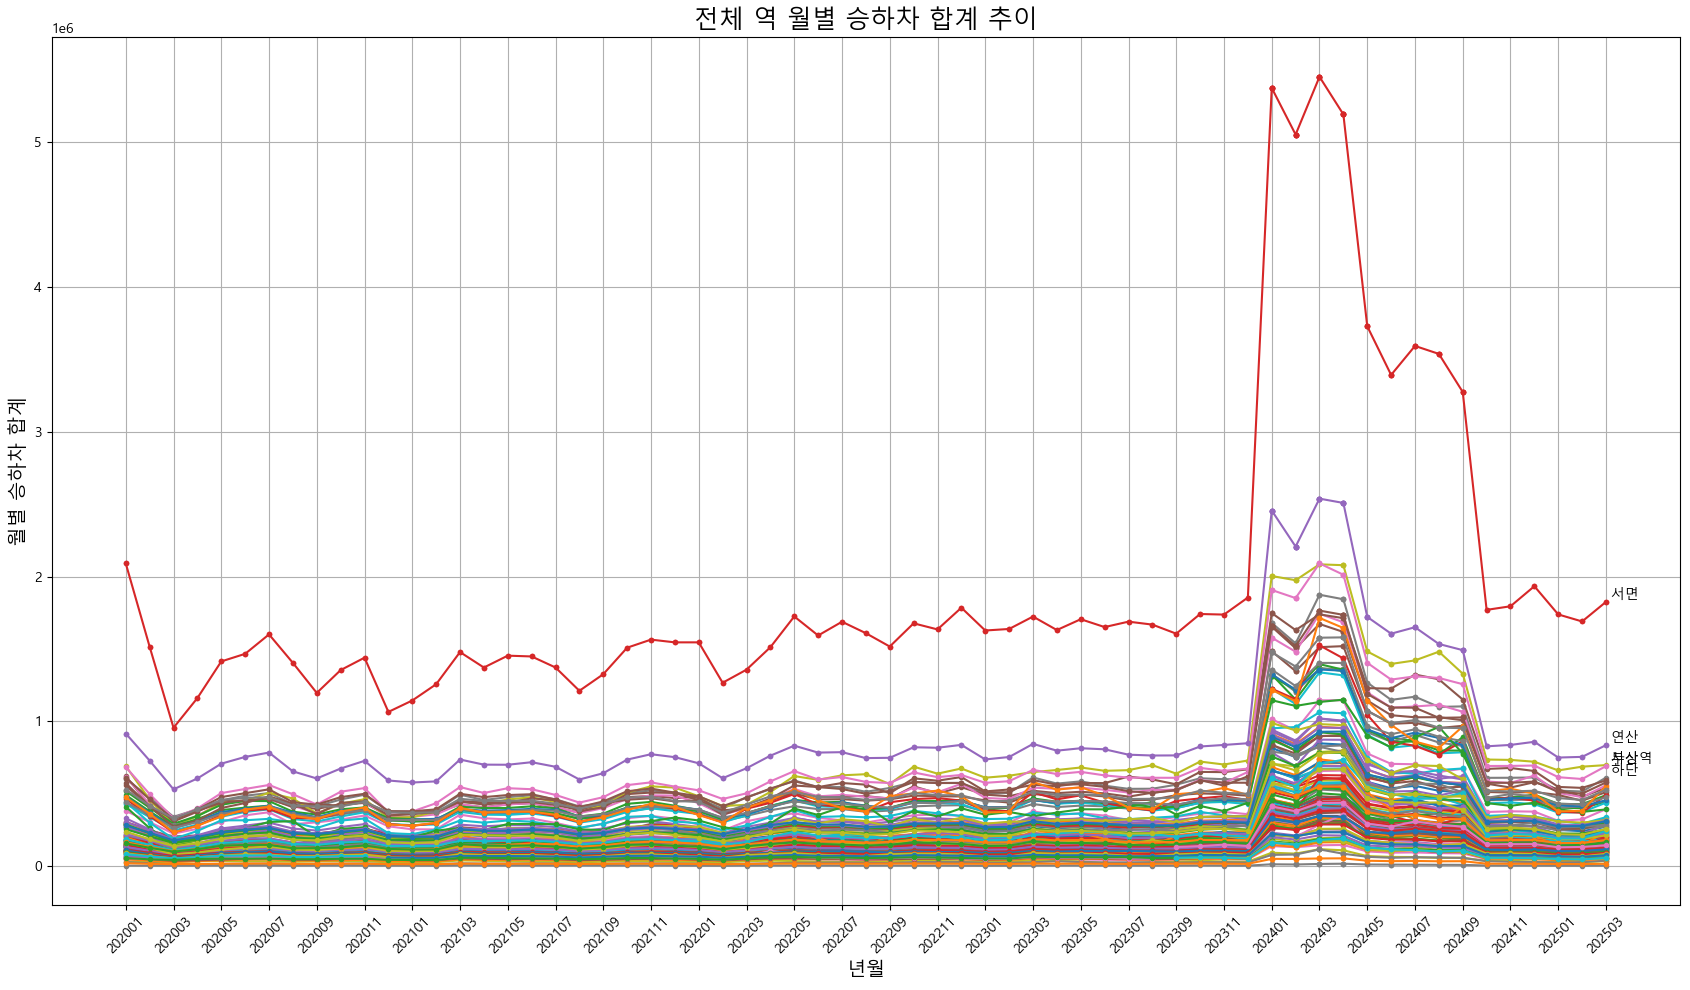

In [161]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_name = 'Malgun Gothic'
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 부호가 깨지는 문제 해결

# 각 역의 2025년 3월 승하차 합계 추출
df_march_list = []  # 빈 리스트 생성
for 역_이름, df_역 in 역_dfs.items():
    if not df_역.empty:  # 데이터프레임이 비어있지 않은 경우에만 접근
        승하차_합계 = df_역['월별 승하차 합계'].iloc[-1]  # 마지막 접근 데이터가 합계
        df_march_list.append({'역': 역_이름, '승하차 합계': 승하차_합계})

df_march = pd.DataFrame(df_march_list).sort_values(by='승하차 합계',
                                                   ascending=False
                                                   )  # 리스트를 데이터프레임으로 변환 및 내림차순 정렬렬

# 2025년 3월 승하차 합계 기준 상위 5개 역 선정
top_5_stations = df_march.head(5)['역'].tolist()  # 상위 5개 역 이름 추출

print(f"2025년 승하차 합계 상위 5개 역: {top_5_stations}")

# 모든 역의 데이터를 하나의 그래프에 그리기 위해 figure와 axes를 미리 생성
fig, ax = plt.subplots(figsize=(20, 10)) # 그래프 크기 설정 (더 크게 조정)

all_years_months = [] # 모든 역의 년월 데이터를 모을 리스트

# 각 역별 데이터를 순회하며 하나의 그래프에 추가
for 역_이름, df_역 in 역_dfs.items():
    # '년월'을 기준으로 정렬
    df_역_sorted = df_역.sort_values(by='년월')

    # 선 그래프 그리기 (하나의 axes에 계속 추가)
    ax.plot(df_역_sorted['년월'], df_역_sorted['월별 승하차 합계'], marker='o', linestyle='-', markersize=3) # label 제거

    # 해당 역의 년월 데이터를 리스트에 추가
    all_years_months.extend(df_역_sorted['년월'].tolist())

# 모든 역의 데이터가 추가된 후 그래프 설정
if all_years_months: # 그래프에 그려진 데이터가 하나라도 있는 경우
    # 모든 고유한 년월 값을 가져와 정렬
    unique_years_months = sorted(list(set(all_years_months)))

    # X축 눈금 설정
    num_ticks = len(unique_years_months)
    tick_spacing = max(1, num_ticks // 24)

    ax.set_xticks(unique_years_months[::tick_spacing])
    ax.tick_params(axis='x', rotation=45, labelsize=10) # X축 레이블 회전 및 크기 조정

    # 그래프 제목 및 축 레이블 설정
    ax.set_title('전체 역 월별 승하차 합계 추이', fontsize=18) # 전체 역을 나타내는 제목으로 변경
    ax.set_xlabel('년월', fontsize=14)
    ax.set_ylabel('월별 승하차 합계', fontsize=14)

    ax.grid(True) # 그리드 표시

    # 상위 5개 역에 이름 텍스트 추가
    for 역_이름 in top_5_stations:
        df_역 = 역_dfs[역_이름]
        # 마지막 데이터 포인트 찾기 (가장 최근 년월)
        last_data = df_역.iloc[-1]
        last_year_month = last_data['년월']
        last_total = last_data['월별 승하차 합계']

        # 마지막 년월의 X축 위치 찾기
        x_pos = unique_years_months.index(last_year_month)
        # 텍스트 추가 (마지막 데이터 포인트 근처에)
        ax.text(x_pos, last_total, f' {역_이름}', fontsize=10, verticalalignment='bottom', horizontalalignment='left')

    plt.tight_layout(rect=[0, 0, 0.85, 1]) # 범례 공간 확보를 위해 레이아웃 조정
    plt.show() # 그래프 표시
else:
    print("그래프를 생성할 데이터가 없습니다.")


In [139]:
역_dfs['서면'].tail()

,역번호,역명,년월일,년월,월별 승하차 합계
3596,219,서면,20250101,202501,1738217
8288,119,서면,20250201,202502,1689750
10192,219,서면,20250201,202502,1689750
14704,119,서면,20250301,202503,1824899
16812,219,서면,20250301,202503,1824899
